### Accessing Data from API

In [2]:
import requests
import json
import pandas as pd

url = "https://api.le-systeme-solaire.net/rest/bodies/"
url_text = requests.get(url).text
celestial_dict = json.loads(url_text)
celestial_dict

{'bodies': [{'id': 'lune',
   'name': 'La Lune',
   'englishName': 'Moon',
   'isPlanet': False,
   'moons': None,
   'semimajorAxis': 384400,
   'perihelion': 363300,
   'aphelion': 405500,
   'eccentricity': 0.0549,
   'inclination': 5.145,
   'mass': {'massValue': 7.346, 'massExponent': 22},
   'vol': {'volValue': 2.1968, 'volExponent': 10},
   'density': 3.344,
   'gravity': 1.62,
   'escape': 2380.0,
   'meanRadius': 1737.0,
   'equaRadius': 1738.1,
   'polarRadius': 1736.0,
   'flattening': 0.0012,
   'dimension': '',
   'sideralOrbit': 27.3217,
   'sideralRotation': 655.728,
   'aroundPlanet': {'planet': 'terre',
    'rel': 'https://api.le-systeme-solaire.net/rest/bodies/terre'},
   'discoveredBy': '',
   'discoveryDate': '',
   'alternativeName': '',
   'axialTilt': 6.68,
   'avgTemp': 0,
   'mainAnomaly': 0.0,
   'argPeriapsis': 0.0,
   'longAscNode': 0.0,
   'bodyType': 'Moon',
   'rel': 'https://api.le-systeme-solaire.net/rest/bodies/lune'},
  {'id': 'phobos',
   'name': 'Ph

In [20]:
celestial_dict['bodies'][1]['meanRadius']

11.1

In [18]:
len(celestial_dict['bodies'])

366

In [12]:
bodies_data = []

# will not be including features of type string other than name
for body in celestial_dict['bodies']:
    bodies_data.append({
        "Name": body["englishName"],
        "Is Planet": body["isPlanet"],
        "Moons": body["moons"],
        "Semimajor Axis (km)": body["semimajorAxis"],
        "Perihelion (km)": body["perihelion"],
        "Aphelion (km)": body["aphelion"],
        "Eccentricity": body["eccentricity"],
        "Inclination": body["inclination"],
        "Mass (kg)": float(mass_value) * 10 ** int(mass_exponent),
        "Volume (m^3)": float(volume_value) * 10 ** int(volume_exponent),
        "Density (g/cm^3)": body["density"],
        "Gravity (m/s^2)": body["gravity"],
        "Escape Velocity (km/s)": body["escape"],
        "Mean Radius (km)": body["meanRadius"],
        "Equatorial Radius (km)": body["equaRadius"],
        "Polar Radius (km)": body["polarRadius"],
        "Sideral Orbit (days)": body["sideralOrbit"],
        "Sideral Rotation (hours)": body["sideralRotation"],
        "Axial Tilt (degrees)": body["axialTilt"],
        "Average Temperature (C)": body["avgTemp"],
        "Main Anomaly (degrees)": body["mainAnomaly"],
        "Argument of Periapsis (degrees)": body["argPeriapsis"],
        "Longitude of Ascending Node (degrees)": body["longAscNode"],
        "Body Type": body["bodyType"]
    })

# Create a pandas DataFrame from the parsed data
df_celestial = pd.DataFrame(bodies_data)

In [13]:
df_celestial

,Name,Is Planet,Moons,Semimajor Axis (km),Perihelion (km),Aphelion (km),Eccentricity,Inclination,Mass (kg),Volume (m^3),...,Equatorial Radius (km),Polar Radius (km),Sideral Orbit (days),Sideral Rotation (hours),Axial Tilt (degrees),Average Temperature (C),Main Anomaly (degrees),Argument of Periapsis (degrees),Longitude of Ascending Node (degrees),Body Type
0,Moon,False,None,384400,363300,405500,0.0549,5.145,8.932000e+22,9997.8,...,1738.1,1736.0,27.32170,655.72800,6.68,0,0.0,0.0,0.0,Moon
1,Phobos,False,None,9378,9234,9518,0.0151,1.075,8.932000e+22,9997.8,...,13.0,9.1,0.31891,0.76530,0.00,0,0.0,0.0,0.0,Moon
2,Deimos,False,None,23459,23456,23471,0.0002,1.075,8.932000e+22,9997.8,...,7.8,5.1,1.26244,30.29856,0.00,0,0.0,0.0,0.0,Moon
3,Io,False,None,421800,420071,423529,0.0040,0.036,8.932000e+22,9997.8,...,0.0,0.0,1.76914,42.45930,0.00,0,0.0,0.0,0.0,Moon
4,Europa,False,None,671100,0,0,0.0090,0.466,8.932000e+22,9997.8,...,0.0,0.0,3.55118,85.22930,0.00,0,0.0,0.0,0.0,Moon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,S/2021 J 5,False,None,23414600,0,0,0.2720,164.900,8.932000e+22,9997.8,...,0.0,0.0,0.00000,0.00000,0.00,0,0.0,0.0,0.0,Moon
362,S/2021 J 6,False,None,22870300,0,0,0.2710,164.900,8.932000e+22,9997.8,...,0.0,0.0,0.00000,0.00000,0.00,0,0.0,0.0,0.0,Moon
363,S/2022 J 1,False,None,22725200,0,0,0.2570,164.500,8.932000e+22,9997.8,...,0.0,0.0,0.00000,0.00000,0.00,0,0.0,0.0,0.0,Moon
364,S/2022 J 2,False,None,23013800,0,0,0.2650,164.700,8.932000e+22,9997.8,...,0.0,0.0,0.00000,0.00000,0.00,0,0.0,0.0,0.0,Moon


### Data Preprocessing and Scaling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# one-hot encoding for isPlanet as the values are of type true or false
# converting true/false to 0/1
df_celestial["Is Planet"] = df_celestial["Is Planet"].astype(int)

# some columns did not have a body type thus checking before applying one hot encoding
if "Body Type" in df_celestial.columns:
    # using dummies for generating 0's and 1's for each body type
    df_celestial = pd.concat([df_celestial, pd.get_dummies(df_celestial["Body Type"], prefix="Body Type")], axis=1)
    df_celestial.drop(columns=["Body Type"], inplace=True)
    
# dropping columns with strings for model
X = df_celestial.drop(columns=["Name", "Moons"])
y = df_celestial[["Body Type_Asteroid", "Body Type_Comet", "Body Type_Dwarf Planet", "Body Type_Moon", "Body Type_Planet"]]

# Split data into training set (60%), validation set (20%), and test set (20%)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [54]:
len(X_train_scaled)

219

### Building Neural Network Model

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# building model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation="relu"))
model.add(Dropout(0.3)) 
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3)) 
model.add(Dense(5, activation="softmax"))

# compiling
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model with the training set
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

# evaluating model on test dataset
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

Epoch 1/50
7/7 [==============================] - 0s 995us/step - loss: 1365680.2500 - accuracy: 0.5708
Epoch 2/50
7/7 [==============================] - 0s 1ms/step - loss: 1230189.8750 - accuracy: 0.7443
Epoch 3/50
7/7 [==============================] - 0s 999us/step - loss: 970799.8750 - accuracy: 0.7397
Epoch 4/50
7/7 [==============================] - 0s 1ms/step - loss: 923011.1250 - accuracy: 0.7443
Epoch 5/50
7/7 [==============================] - 0s 940us/step - loss: 662740.8750 - accuracy: 0.7580
Epoch 6/50
7/7 [==============================] - 0s 982us/step - loss: 671384.3125 - accuracy: 0.6895
Epoch 7/50
7/7 [==============================] - 0s 935us/step - loss: 630623.4375 - accuracy: 0.6256
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 533593.1250 - accuracy: 0.6986
Epoch 9/50
7/7 [==============================] - 0s 967us/step - loss: 424387.0938 - accuracy: 0.6895
Epoch 10/50
7/7 [==============================] - 0s 950us/step - loss: 3562

3/3 [==============================] - 0s 1ms/step


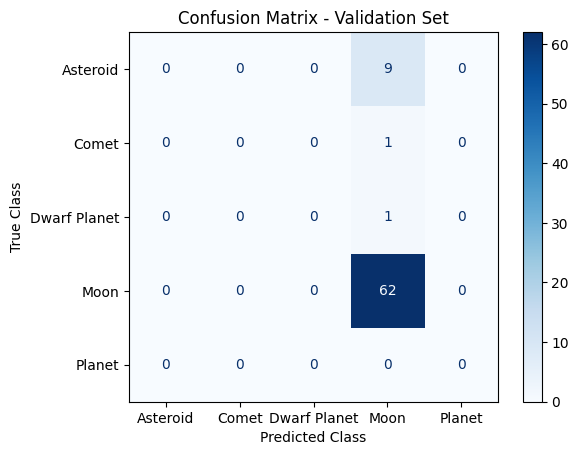

In [56]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use the trained model to predict on the validation set
predictions_val = model.predict(X_val_scaled)

# Convert predictions to class labels for validation set
class_labels = ["Asteroid", "Comet", "Dwarf Planet", "Moon", "Planet"]
predicted_class_indices_val = np.argmax(predictions_val, axis=1)
predicted_class_labels_val = [class_labels[idx] for idx in predicted_class_indices_val]

# Get the actual class labels from the validation set
actual_class_indices_val = np.argmax(y_val.values, axis=1)
actual_class_labels_val = [class_labels[idx] for idx in actual_class_indices_val]

# Create a confusion matrix for validation set
conf_matrix_val = confusion_matrix(actual_class_labels_val, predicted_class_labels_val, labels=class_labels)

# Create the ConfusionMatrixDisplay and plot the confusion matrix for validation set
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=class_labels)
disp_val.plot(cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix - Validation Set")
plt.show()